In [1]:
# A. Importing packages, necessary datasets and concluding to our final dataset 

# i. Importing the packages  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import wb
import ipywidgets as widgets

In [2]:
# ii. Dowloading data from the World Bank (Countries, Years and GDP Growth)
gdp = wb.download(indicator='NY.GDP.MKTP.KD.ZG', country=['all'], start=1997, end=2018)
gdp = gdp.rename(columns={'NY.GDP.MKTP.KD.ZG':'gdp growth'})
gdp = gdp.reset_index()
gdp['year'] = gdp['year'].astype(int) #datetime %year%
print(gdp)

                     country  year  gdp growth
0                 Arab World  2018         NaN
1                 Arab World  2017    0.976783
2                 Arab World  2016    3.242399
3                 Arab World  2015    3.342473
4                 Arab World  2014    2.452966
5                 Arab World  2013    3.135112
6                 Arab World  2012    6.695718
7                 Arab World  2011    3.608109
8                 Arab World  2010    4.749403
9                 Arab World  2009    0.465712
10                Arab World  2008    5.761859
11                Arab World  2007    4.534978
12                Arab World  2006    6.483952
13                Arab World  2005    5.720967
14                Arab World  2004    9.336038
15                Arab World  2003    5.307730
16                Arab World  2002    0.631930
17                Arab World  2001    1.623529
18                Arab World  2000    5.463191
19                Arab World  1999    1.851039
20           

In [4]:
# iii(a). The rest of the datasets were downloaded from OECD and imported manually
 
# iii(b). Data (Country code and Country)
country_codes = "./dataproject/data/ccode.xls"
ccode = pd.read_excel(country_codes)
ccode.rename(columns = {'Country':'country', 'CODE':'Country Code'}, inplace = True)
ccode.head()

,Country Code,country
0,ABW,Aruba
1,AFG,Afghanistan
2,AFRI,Africa
3,AGO,Angola
4,AIA,Anguilla


In [5]:
# iv. Merging the two imported DataFrames (ccode and gdp)
GDP_ccode = pd.merge(gdp, ccode, how = 'outer', on = ['country'])
GDP_ccode.rename(columns = {'year':'Year'}, inplace = True)
GDP_ccode['Country Code'].unique()
GDP_ccode.head()

,country,Year,gdp growth,Country Code
0,Arab World,2018.0,NaN,NaN
1,Arab World,2017.0,0.976783,NaN
2,Arab World,2016.0,3.242399,NaN
3,Arab World,2015.0,3.342473,NaN
4,Arab World,2014.0,2.452966,NaN


In [6]:
# v(a). Data (Country Code, Year, Average wage and Average Wage Growth (%)) 
avg_wage = "./dataproject/data/OECDwage.csv"
wages = pd.read_csv(avg_wage)
wages.head()

# v(b). Cleaning the dataset, calculate the Average Wage Growth (%) and store it in a new column
drop_these = ['INDICATOR', 'SUBJECT' ,'MEASURE', 'FREQUENCY', 'Flag Codes']
wages.drop(drop_these, axis = 1, inplace = True)

wages.rename(columns = {'LOCATION':'Country Code', 'TIME':'Year', 'Value':'Average Wage'}, inplace = True)
wages["Average Wage Growth (%)"] = wages['Average Wage'].pct_change()*100
wages.head()

,Country Code,Year,Average Wage,Average Wage Growth (%)
0,AUS,1997,40902.825366,NaN
1,AUS,1998,41503.236390,1.467896
2,AUS,1999,42556.169985,2.536992
3,AUS,2000,42702.425882,0.343677
4,AUS,2001,42311.078226,-0.916453


In [7]:
# vi(a). Data (Country Code, Year and Total Unemployment (%)) 
total_unemployment = "./dataproject/data/unempl.csv"
tot_unempl = pd.read_csv(total_unemployment)

#vi(b). Cleaning and manipulating the data
drop_these = ['INDICATOR', 'SUBJECT' , 'MEASURE', 'FREQUENCY', 'Flag Codes']
tot_unempl.drop(drop_these, axis = 1, inplace = True)
tot_unempl.rename(columns = {'LOCATION':'Country Code', 'TIME':'Year', 'Value':'Total Unemployment (%)'}, inplace = True)
tot_unempl.head()

,Country Code,Year,Total Unemployment (%)
0,AUS,1997,8.362488
1,AUS,1998,7.677429
2,AUS,1999,6.873791
3,AUS,2000,6.285546
4,AUS,2001,6.742173


In [8]:
# vii(a). Data (country Code, Year and Inflation Rate (%))
inflation_rate = "./dataproject/data/inflation.csv"
inflation = pd.read_csv(inflation_rate)

# vii(b). Cleaning and manipulating the data
drop_columnsi = ['INDICATOR', 'SUBJECT' , 'MEASURE', 'FREQUENCY', 'Flag Codes']
inflation.drop(drop_columnsi, axis = 1, inplace = True)
inflation.rename(columns = {'LOCATION':'Country Code', 'TIME':'Year', 'Value':'Inflation Rate (%)'}, inplace = True)
inflation.head()

,Country Code,Year,Inflation Rate (%)
0,AUS,1997,0.224887
1,AUS,1998,0.860135
2,AUS,1999,1.483129
3,AUS,2000,4.457435
4,AUS,2001,4.407135


In [9]:
# viii. Merging the last three imported datasets (wages, tot_unempl and inflation)
wage_unempl = pd.merge(wages, tot_unempl, how = 'outer', on = ['Country Code', 'Year'])
wage_unempl.head(10)

wage_unempl_infl = pd.merge(wage_unempl, inflation, how = 'outer', on = ['Country Code','Year'])
wage_unempl_infl.head()

,Country Code,Year,Average Wage,Average Wage Growth (%),Total Unemployment (%),Inflation Rate (%)
0,AUS,1997,40902.825366,NaN,8.362488,0.224887
1,AUS,1998,41503.236390,1.467896,7.677429,0.860135
2,AUS,1999,42556.169985,2.536992,6.873791,1.483129
3,AUS,2000,42702.425882,0.343677,6.285546,4.457435
4,AUS,2001,42311.078226,-0.916453,6.742173,4.407135


In [10]:
# ix(a). Creating the final dataset (after merging the two merged datasets) 
final = pd.merge(wage_unempl_infl, GDP_ccode, on = ['Country Code', 'Year'], how = 'left')
final.head()

final = final.reindex(columns = ['Year','country','Country Code','gdp growth', 'Inflation Rate (%)','Total Unemployment (%)', 'Average Wage', 'Average Wage Growth (%)'])
final.head(20)

,Year,country,Country Code,gdp growth,Inflation Rate (%),Total Unemployment (%),Average Wage,Average Wage Growth (%)
0,1997,Australia,AUS,3.966420,0.224887,8.362488,40902.825366,NaN
1,1998,Australia,AUS,4.576739,0.860135,7.677429,41503.236390,1.467896
2,1999,Australia,AUS,5.018064,1.483129,6.873791,42556.169985,2.536992
3,2000,Australia,AUS,3.943189,4.457435,6.285546,42702.425882,0.343677
4,2001,Australia,AUS,1.933106,4.407135,6.742173,42311.078226,-0.916453
5,2002,Australia,AUS,4.003022,2.981575,6.368911,42602.277692,0.688235
6,2003,Australia,AUS,2.985745,2.732596,5.928420,43100.656217,1.169840
7,2004,Australia,AUS,4.001106,2.343255,5.396734,44441.813542,3.111687
8,2005,Australia,AUS,3.190316,2.691832,5.033881,45016.207678,1.292463
9,2006,Australia,AUS,2.834233,3.555288,4.785240,45307.351517,0.646753


In [11]:
# ix(b.) Dropping G20, EU28, EA19, non-OECD countries and years that are not in the range (2003, 2017)
for val in ['20','19','28']:
    I = final['Country Code'].str.contains(val)
    final = final.loc[I == False]

A = ['Brazil', 'Indonesia', 'South Africa', 'Colombia', 'China', 'India', 'Saudi Arabia', 'Argentina', 'Costa Rica']
for val in A: 
    I = final['country'].str.contains(val)
    final = final.loc[I == False]   
final['country'].unique() 

final = final[final.Year > 2002]
final = final[final.Year < 2018]

In [12]:
# ix(c). Adding missing values for unemployment (for Switzerland, Lithuania and Turkey)
# (data gained from World Bank)
add = {'2003':'4.119999886','2004':'4.320000172', '2005':'4.440000057', '2006':'4','2007':'3.65000009', '2008':'3.349999905','2009':'4.119999886' }
for key, value in add.items():
   I = (final['country'] == 'Switzerland') & (final['Year'] == int(key))
   final.loc[I, ['Total Unemployment (%)']] = value
final[final['country'] == 'Switzerland'].head(10)

addL = {'2003':'12.86999989','2004':'10.68000031'}
for key, value in addL.items():
   I = (final['country'] == 'Lithuania') & (final['Year'] == int(key))
   final.loc[I, ['Total Unemployment (%)']] = value

addT =  {'2003':'10.53999996','2004':'10.84000015', '2005':'10.64000034'}
for key, value in addT.items():
   I = (final['country'] == 'Turkey') & (final['Year'] == int(key))
   final.loc[I, ['Total Unemployment (%)']] = value

final = final.sort_values(['country','Year'])
final[final.isnull().any(axis=1)] #Checking if there are any NaN values in our dataset
                                  #(NaN for Turkey - Average Wage and Average Wage Growth (%))

,Year,country,Country Code,gdp growth,Inflation Rate (%),Total Unemployment (%),Average Wage,Average Wage Growth (%)
915,2003,Turkey,TUR,5.608342,21.602440,10.53999996,NaN,NaN
916,2004,Turkey,TUR,9.644246,8.598262,10.84000015,NaN,NaN
917,2005,Turkey,TUR,9.009901,8.179160,10.64000034,NaN,NaN
748,2006,Turkey,TUR,7.109756,9.597242,8.75046,NaN,NaN
749,2007,Turkey,TUR,5.030441,8.756181,8.88715,NaN,NaN
750,2008,Turkey,TUR,0.845219,10.444130,9.72854,NaN,NaN
751,2009,Turkey,TUR,-4.704445,6.250977,12.5806,NaN,NaN
752,2010,Turkey,TUR,8.487358,8.566444,10.6845,NaN,NaN
753,2011,Turkey,TUR,11.113499,6.471879,8.81476,NaN,NaN
754,2012,Turkey,TUR,4.789920,8.891570,8.16661,NaN,NaN


In [14]:
# ix(d). Converting "Unemployment Rate (%)" column to float type and rounding the columns with two decimals 
#numbers to two decimal points
final['Total Unemployment (%)'] = final['Total Unemployment (%)'].astype(float)
final.info()

final.rename(columns = {'country':'Country', 'gdp growth':'GDP Growth (%)'}, inplace = True) # Renaming "country" and "gdp growth" for consistency

final['GDP Growth (%)'] = final['GDP Growth (%)'].round(2)
final['Inflation Rate (%)'] = final['Inflation Rate (%)'].round(2)
final['Total Unemployment (%)'] = final['Total Unemployment (%)'].round(2)
final['Average Wage'] = final['Average Wage'].round(2)
final['Average Wage Growth (%)'] = final['Average Wage Growth (%)'].round(2)
final.head(10)

# ix(e). Saving the final dataset for easier and faster use
final.to_csv("./dataproject/data/thedata.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 6 to 566
Data columns (total 8 columns):
Year                       540 non-null int64
Country                    540 non-null object
Country Code               540 non-null object
GDP Growth (%)             540 non-null float64
Inflation Rate (%)         540 non-null float64
Total Unemployment (%)     540 non-null float64
Average Wage               525 non-null float64
Average Wage Growth (%)    525 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 38.0+ KB


In [16]:
# B. Importing the created dataset (thedata) and ploting 

# i. Importing the dataset and renaming the columns
thedata = pd.read_csv("./dataproject/data/thedata.csv")
thedata.rename(columns = {'country':'Country', 'gdp growth':'GDP Growth (%)', '(%) AVG Wage':'AVG Wage Growth (%)'}, inplace = True)
thedata.head()

,Year,Country,Country Code,GDP Growth (%),Inflation Rate (%),Total Unemployment (%),Average Wage,Average Wage Growth (%)
0,2003,Australia,AUS,2.99,2.73,5.93,43100.66,1.17
1,2004,Australia,AUS,4.00,2.34,5.40,44441.81,3.11
2,2005,Australia,AUS,3.19,2.69,5.03,45016.21,1.29
3,2006,Australia,AUS,2.83,3.56,4.79,45307.35,0.65
4,2007,Australia,AUS,3.78,2.33,4.38,46557.62,2.76


In [17]:
# ii. Plotting the comparison between two countries based on a variable
def _plot_1(thedata,Country1,Country2,Variable1):

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    thedata.loc[:,['Year']] = pd.to_numeric(thedata['Year'])
                                                                
    I = (thedata['Country'] == Country1)
    i = (thedata['Country'] == Country2)
    
    x = thedata.loc[I,'Year']
    y = thedata.loc[I,Variable1]
    z = thedata.loc[i,Variable1]

    label1 = Country1
    label2 = Country2
    ax.plot(x, y, label = label1)
    ax.plot(x, z, label = label2)
    
    ax.set_xticks(list(range(2003, 2017 + 1, 2)))
    ax.set_xlabel('Year')
    ax.legend(loc = 'upper right')
    


def plot_1(thedata):
 
    widgets.interact(_plot_1,  
    thedata = widgets.fixed(thedata),
        Country1 = widgets.Dropdown(
        description = 'OECD Country (No data for % AVG Wage for Turkey)', 
        options = thedata['Country'].unique().tolist(),
        value = 'Australia',
        disabled = False),

        Country2 = widgets.Dropdown(
        description = 'OECD Country (No data for % AVG Wage for Turkey)', 
        options = thedata['Country'].unique().tolist(),
        value = 'Australia',
        disabled = False),

        Variable1 = widgets.Dropdown(
        description = 'Variable1', 
        options = ['Total Unemployment (%)','Inflation Rate (%)','Average Wage Growth (%)','GDP Growth (%)'], 
        value = 'Total Unemployment (%)'),

    )    
plot_1(thedata)

interactive(children=(Dropdown(description='OECD Country (No data for % AVG Wage for Turkey)', options=('Austr…

In [18]:
# iii. Plotting the trend between two variables for each country

def _plot_2(thedata,Country,variable1,variable2):

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    thedata.loc[:,['Year']] = pd.to_numeric(thedata['Year'])
                                                                
    I = (thedata['Country'] == Country)
    
    x = thedata.loc[I,'Year']
    y = thedata.loc[I,variable1]
    z = thedata.loc[I,variable2]
    ax.plot(x, y, 'g')
    ax.plot(x, z, 'y')
    
    ax.set_xticks(list(range(2003, 2017 + 1, 2)))
    ax.set_xlabel('Year')
    ax.legend(loc = 'upper right')

def plot_2(thedata):
    
    widgets.interact(_plot_2,  
    thedata = widgets.fixed(thedata),
        Country = widgets.Dropdown(
        description = 'OECD Country (No data for % AVG Wage for Turkey)', 
        options = thedata['Country'].unique().tolist(),
        value = 'Australia',
        disabled = False),
                     
        variable1 = widgets.Dropdown(
        description = 'Variable1', 
        options = ['Total Unemployment (%)','Inflation Rate (%)','Average Wage Growth (%)','GDP Growth (%)'], 
        value = 'GDP Growth (%)'),
                     
        variable2 = widgets.Dropdown(
        description = 'Variable2', 
        options = ['Total Unemployment (%)','Inflation Rate (%)','Average Wage Growth (%)','GDP Growth (%)'], 
        value = 'Inflation Rate (%)')
        
    )                 

plot_2(thedata)

interactive(children=(Dropdown(description='OECD Country (No data for % AVG Wage for Turkey)', options=('Austr…

interactive(children=(Dropdown(description='OECD Country', options=('Australia', 'Austria', 'Belgium', 'Canada…

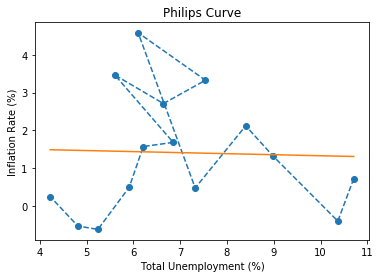

In [19]:
# iv. Plotting the Phillips Curve after choosing the country
def _philips_curve(thedata,Country):
 
    thedata.loc[:,['Year']] = pd.to_numeric(thedata['Year'])
    
    I = (thedata['Country'] == Country)
    
    a = thedata.loc[I,'Total Unemployment (%)']
    b = thedata.loc[I,'Inflation Rate (%)']
    
    plt.scatter(a,b)
    plt.xlabel('Total Unemployment (%)')
    plt.ylabel('Inflation Rate (%)')
    plt.title('Philips Curve')
    
    plt.plot(a, b, '--')

    YEAR = thedata.loc[I,'Year']
    
    plt.plot(np.unique(a), np.poly1d(np.polyfit(a, b, 1))(np.unique(a)))
    
    for i, txt in enumerate(YEAR):
        plt.annotate(txt,(a[i], b[i]))
    
def philips_curve(thedata):
    
    widgets.interact(_philips_curve,  
    thedata = widgets.fixed(thedata),
        Country = widgets.Dropdown(
        description = 'OECD Country', 
        options = thedata['Country'].unique().tolist(),
        value = 'Australia',
        disabled = False)
                    )
                    
philips_curve(thedata)